In [1]:
import numpy as np
 
import os

In [2]:
#os.chdir("../input")
import pandas as pd
data = pd.read_csv("T351_aluminium_data_true.csv")
data[0:5]

,R,delta_K,crack_growth_rate
0,0.0,3.31514,5.040000e-07
1,0.0,3.36765,8.930000e-07
2,0.0,3.44451,1.010000e-06
3,0.0,3.52313,1.190000e-06
4,0.0,3.61371,1.730000e-06


In [3]:
original_data = pd.read_csv("T351_aluminium_data_true.csv")

In [4]:
data.shape

(77, 3)

In [5]:
data["crack_growth_rate"] = (10**(5) ) * data["crack_growth_rate"]

In [6]:
from keras.callbacks import ModelCheckpoint
from keras.models import Sequential
from keras.layers import Dense, Activation, Flatten
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error 


Using TensorFlow backend.


In [7]:
from keras.models import model_from_json

In [10]:
x=data.drop(['crack_growth_rate'],axis=1)
y=data.drop(['R','delta_K'],axis=1)
X_train,X_test,y_train,y_test = train_test_split(x,y,test_size=0.1)



In [8]:
#changing the training data9training only on R(0.1,0.3,0.5)
train_data = data.loc[data['R']!=0.1]
X_train = train_data.drop(['crack_growth_rate'],axis = 1)
y_train = train_data.drop(['R','delta_K'],axis = 1)
test_data = data.loc[data['R']==0.1]
X_test = test_data.drop(['crack_growth_rate'],axis = 1)
y_test = test_data.drop(['R','delta_K'],axis = 1)

In [9]:
X_train.shape[0]

55

In [10]:
NN_model = Sequential()

# The Input Layer :
NN_model.add(Dense(128, kernel_initializer='normal',input_dim = X_train.shape[1], activation='sigmoid'))

Instructions for updating:
Colocations handled automatically by placer.


In [11]:
# The Hidden Layers :
NN_model.add(Dense(256, kernel_initializer='normal',activation='relu'))
NN_model.add(Dense(256, kernel_initializer='normal',activation='relu'))
NN_model.add(Dense(256, kernel_initializer='normal',activation='relu'))
# The Output Layer :
NN_model.add(Dense(1, kernel_initializer='normal',activation='linear'))
# Compile the network :
NN_model.compile(loss='mean_absolute_error', optimizer='adam', metrics=['mean_absolute_error'])
NN_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 128)               384       
_________________________________________________________________
dense_2 (Dense)              (None, 256)               33024     
_________________________________________________________________
dense_3 (Dense)              (None, 256)               65792     
_________________________________________________________________
dense_4 (Dense)              (None, 256)               65792     
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 257       
Total params: 165,249
Trainable params: 165,249
Non-trainable params: 0
_________________________________________________________________


In [12]:
NN_model.fit(X_train,y_train, epochs=1000, batch_size=32, validation_split = 0.15)

Instructions for updating:
Use tf.cast instead.
Train on 46 samples, validate on 9 samples
Epoch 1/1000
46/46 [==============================] - 4s 80ms/step - loss: 3.8391 - mean_absolute_error: 3.8391 - val_loss: 2.2207 - val_mean_absolute_error: 2.2207
Epoch 2/1000
46/46 [==============================] - 0s 434us/step - loss: 3.6957 - mean_absolute_error: 3.6957 - val_loss: 2.0221 - val_mean_absolute_error: 2.0221
Epoch 3/1000
46/46 [==============================] - 0s 564us/step - loss: 3.7426 - mean_absolute_error: 3.7426 - val_loss: 1.9967 - val_mean_absolute_error: 1.9967
Epoch 4/1000
46/46 [==============================] - 0s 499us/step - loss: 3.7283 - mean_absolute_error: 3.7283 - val_loss: 2.0733 - val_mean_absolute_error: 2.0733
Epoch 5/1000
46/46 [==============================] - 0s 455us/step - loss: 3.6966 - mean_absolute_error: 3.6966 - val_loss: 2.2268 - val_mean_absolute_error: 2.2268
Epoch 6/1000
46/46 [==============================] - 0s 585us/step - loss: 3.68

In [13]:
predictions = NN_model.predict(X_test)

In [14]:
import sklearn.metrics as metrics
metrics.explained_variance_score(y_test, predictions)

0.9814026015948297

In [15]:
predictions

array([[ 0.13663755],
       [ 0.14261046],
       [ 0.16209511],
       [ 0.18309559],
       [ 0.20207587],
       [ 0.26218423],
       [ 0.32516557],
       [ 0.40721065],
       [ 0.6285164 ],
       [ 1.014555  ],
       [ 1.0932261 ],
       [ 1.6719658 ],
       [ 2.2518427 ],
       [ 3.4606133 ],
       [ 4.633247  ],
       [ 5.731708  ],
       [ 7.1075883 ],
       [ 9.27016   ],
       [10.445236  ],
       [14.425582  ],
       [19.812534  ],
       [32.08703   ]], dtype=float32)

In [17]:
y_test

,crack_growth_rate
21,0.0761
22,0.1150
23,0.1730
24,0.1890
25,0.2430
26,0.2800
27,0.3940
28,0.4880
29,0.5740
30,0.7910


In [18]:
y_test.shape

(22, 1)

In [19]:
actual_y = y_test.values
error =0
for i in range(22):
    error += abs((actual_y[i])-(predictions[i]))
    

In [20]:
error/22

array([0.51870799])

In [21]:
data.mean()

R                    0.197403
delta_K              5.721191
crack_growth_rate    4.147470
dtype: float64

In [22]:
percentage_error = 0
total_error = 0
total_per_error = 0
for i in range(22):
    per_error = ((abs(actual_y[i]-predictions[i]))/(actual_y[i]) )* 100
    percentage_error += per_error
    

In [23]:
percentage_error / 22

array([15.23252581])

C:\Users\vinod khoja\AppData\Local\conda\conda\envs\keras-gpu\lib\site-packages\ipykernel_launcher.py:3: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  This is separate from the ipykernel package so we can avoid doing imports until


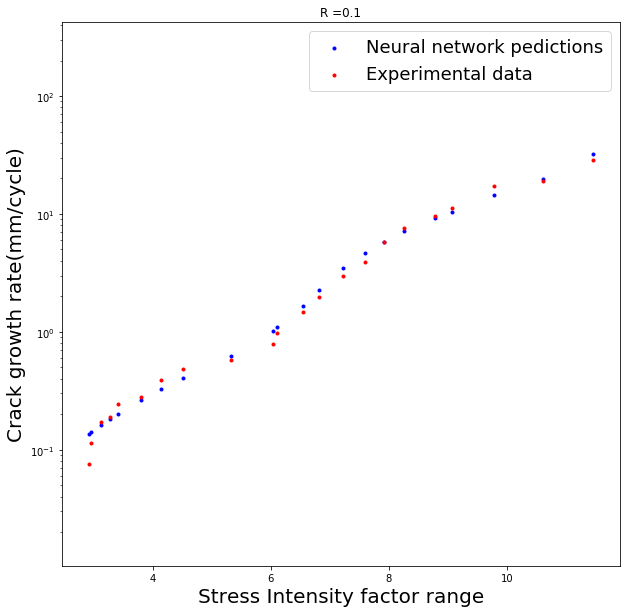

In [26]:

fig = plt.figure(figsize=(10,10))
plt.yscale('log')
ax0= fig.add_subplot(111)
line1=ax0.scatter(X_test.delta_K, predictions, c= 'b',marker ='.',label='Neural network pedictions')
line2=ax0.scatter(X_test.delta_K,y_test, c= 'r' , marker ='.',label='Experimental data')
ax0.set_xlabel('Stress Intensity factor range',fontsize =20)
ax0.set_ylabel('Crack growth rate(mm/cycle)',fontsize =20)
ax0.set_title('R =0.1')
ax0.legend(fontsize=18)
plt.savefig('NN_on_unseen_R.png')
#ax0.set_facecolor('#82cafc')

In [98]:
my_X = data.drop(['crack_growth_rate'],axis=1)
y=data.drop(['R','delta_K'],axis=1)
#predicting_on_complete_dataset = NN_model.predict(my_X)

In [19]:
#predicting_on_complete_dataset.shape
my_y = y.values

In [20]:
percentage_error = 0
total_error = 0
total_per_error = 0
for i in range(77):
    per_error = ((abs(my_y[i]-predicted_dadN[i]))/(my_y[i]) )* 100
    percentage_error += per_error

In [21]:
percentage_error/77

array([10.27821042])

In [9]:
model_json = NN_model.to_json()
with open("model.json", "w") as json_file:
    json_file.write(model_json)
NN_model.save_weights("model.h5")
print("Saved model to disk")

NameError: name 'NN_model' is not defined

In [9]:
json_file = open('model.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
loaded_model = model_from_json(loaded_model_json)
# load weights into new model

loaded_model.load_weights("model.h5")
print("Loaded model from disk")

loaded_model.compile(loss='mean_absolute_error', optimizer='adam', metrics=['mean_absolute_error'])

Instructions for updating:
Colocations handled automatically by placer.
Loaded model from disk


In [10]:
complete_features = data.drop("crack_growth_rate", axis = 1)

In [11]:
predicted_dadN = loaded_model.predict(complete_features)

In [12]:
original_data["predicted_crack_growth_rate"] = predicted_dadN * (10**(-5))
#Now original data contains predicted and experimental values

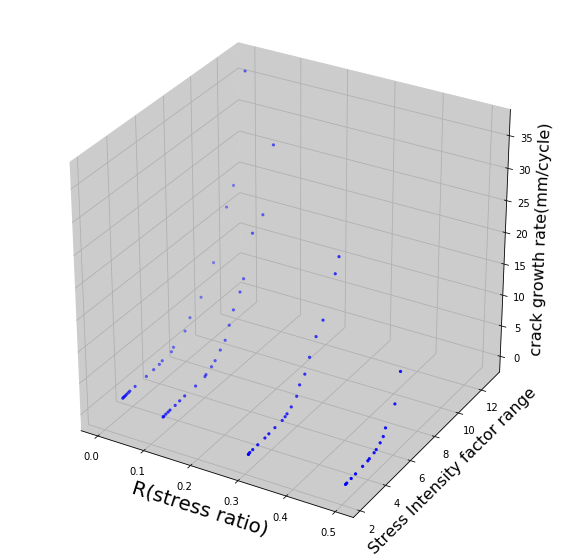

In [25]:
from mpl_toolkits.mplot3d import axes3d
import matplotlib.pyplot as plt
fig = plt.figure(figsize = (10,10))
ax = fig.add_subplot(111, projection = '3d')

#plt.gca().patch.set_facecolor('white')
ax.w_xaxis.set_pane_color((0.8, 0.8, 0.8, 1.0))
ax.w_yaxis.set_pane_color((0.8, 0.8, 0.8, 1.0))
ax.w_zaxis.set_pane_color((0.8, 0.8, 0.8, 1.0))

X = data['R'].values
Y = data['delta_K'].values
Z = data['crack_growth_rate'].values
ax.scatter(X,Y,Z, c = 'b' , marker = '.')
ax.set_xlabel('R(stress ratio)',fontsize =20)
ax.set_ylabel('Stress Intensity factor range',fontsize =16)
ax.set_zlabel('crack growth rate(mm/cycle)',fontsize =16)
#ax.grid(False)
plt.savefig('training_data.png')
plt.show()

In [14]:
subdf_0 = data.loc[data['R'] == 0]
subdf_1 = data.loc[data['R'] == 0.1]
subdf_3 = data.loc[data['R'] == 0.3]
subdf_5 = data.loc[data['R'] == 0.5]

In [16]:
## predict for R = 0
r0_data_predictions = loaded_model.predict(subdf_0.drop("crack_growth_rate",axis = 1))

In [17]:
# one hell of a result/.///chill

In [18]:
#fitting the parislaw
from scipy.optimize import curve_fit 
indexes = np.sort(np.random.choice(21, size=15, replace=False))
paris_y = (subdf_0.crack_growth_rate.values[indexes])* (10**(-5))

paris_x = subdf_0.delta_K.values[indexes]
  
def test(paris_x, C, m): 
    return C * (paris_x ** (m)) 
  
param, param_cov = curve_fit(test, paris_x, paris_y) 
  
print("funcion coefficients:") 
print(param) 


funcion coefficients:
[1.98424357e-10 5.64557757e+00]


In [19]:
paris_x_test = subdf_0.delta_K.values
paris_predictions = param[0] * ((paris_x_test)**(param[1]))

In [20]:
paris_predictions

array([1.72237886e-07, 1.88217577e-07, 2.13791122e-07, 2.42841667e-07,
       2.80261605e-07, 3.36208056e-07, 3.88019065e-07, 6.68320397e-07,
       1.83929288e-06, 3.27796539e-06, 4.97061701e-06, 6.07233904e-06,
       1.10208382e-05, 1.25182917e-05, 2.44354122e-05, 3.20325603e-05,
       5.60588050e-05, 1.00135155e-04, 1.75241063e-04, 2.29726169e-04,
       3.61263252e-04])

C:\Users\vinod khoja\AppData\Local\conda\conda\envs\keras-gpu\lib\site-packages\ipykernel_launcher.py:3: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  This is separate from the ipykernel package so we can avoid doing imports until


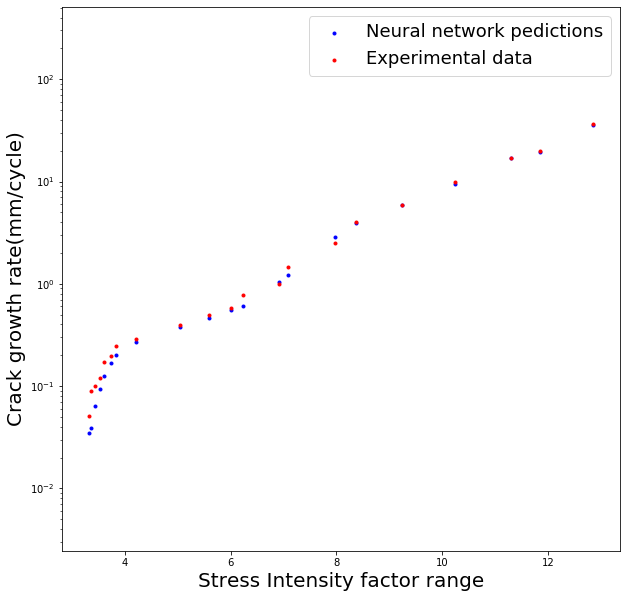

In [21]:
fig = plt.figure(figsize=(10,10))
plt.yscale('log')
ax0= fig.add_subplot(111)
line1=ax0.scatter(subdf_0.delta_K, r0_data_predictions, c= 'b',marker ='.',label='Neural network pedictions')
line2=ax0.scatter(subdf_0.delta_K,subdf_0.crack_growth_rate, c= 'r' , marker ='.',label='Experimental data')
ax0.set_xlabel('Stress Intensity factor range',fontsize =20)
ax0.set_ylabel('Crack growth rate(mm/cycle)',fontsize =20)

ax0.legend(fontsize=18)
#ax0.set_facecolor('#82cafc')
plt.savefig('NN_with_exp_data.png')
# ax0.scatter(subdf_1.delta_K,subdf_1.crack_growth_rate, c= 'b' , marker ='.')
# ax0.scatter(subdf_3.delta_K,subdf_3.crack_growth_rate, c= 'b' , marker ='o')
# ax0.scatter(subdf_5.delta_K,subdf_5.crack_growth_rate, c= 'r' , marker ='o')


C:\Users\vinod khoja\AppData\Local\conda\conda\envs\keras-gpu\lib\site-packages\ipykernel_launcher.py:6: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  


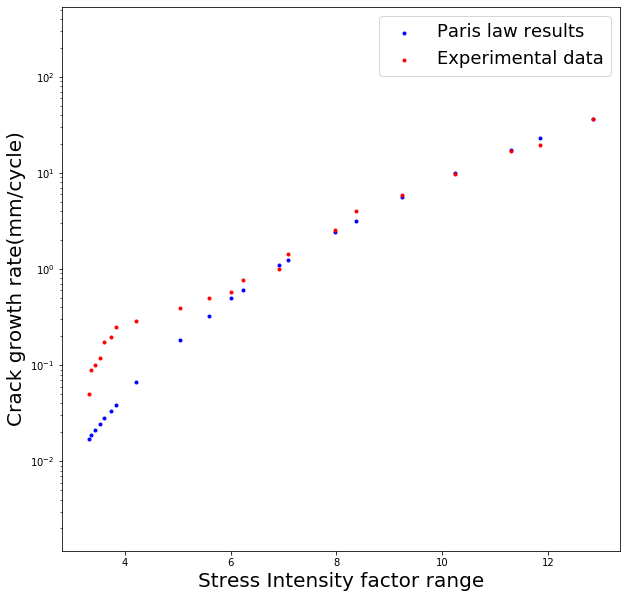

In [22]:
#plotting paris_predictions with experimental_data
fig = plt.figure(figsize=(10,10))
plt.yscale('log')
#plt.rcParams.update({'font.size':15})

ax0= fig.add_subplot(111)
ax0.scatter(subdf_0.delta_K, paris_predictions*(10**5), c= 'b',marker ='.',label='Paris law results')
ax0.scatter(subdf_0.delta_K,subdf_0.crack_growth_rate, c= 'r' , marker ='.',label='Experimental data')
ax0.set_xlabel('Stress Intensity factor range',fontsize=20)
ax0.set_ylabel('Crack growth rate(mm/cycle)',fontsize =20)
ax0.legend(fontsize=18)
plt.savefig('paris_law_with_exp_data.png')

In [23]:
# calculating the mean squared error for both Paris and Sequenial Neural Network models
paris_error = 0
NN_error = 0
experimental_dadN = subdf_0.crack_growth_rate.values
for i in range(20):
    paris_error += abs((experimental_dadN[i] * (10 **(-5)))**(2) - (paris_predictions[i])**(2))
    NN_error+=abs((experimental_dadN[i] * (10**(-5)))**(2) - (r0_data_predictions[i] * (10 ** (-5)))**(2))
print("MSE of the Paris model is :")
print(paris_error/21)

##as paris model's MSE is calculated completely on training_data itself it is likely to show better MSE than teh actual.
## train on only 15 points and then test on all 21 points to achieve a clear comparison.
print("MSW of the Neural Network model is :")
print(NN_error/21)

MSE of the Paris model is :
8.042189074573223e-10
MSW of the Neural Network model is :
[1.6599495e-10]


In [24]:
subdf_1.shape[0]

22

In [66]:
Rs = [0,0.1,0.3,0.5]
from scipy.optimize import curve_fit

for r in Rs:
    subdf_any = data.loc[data['R'] == r]
    nn_predictions = NN_model.predict(subdf_any.drop("crack_growth_rate",axis = 1))
    indexes = np.sort(np.random.choice(subdf_any.shape[0], size=14, replace=False))
    paris_y = (subdf_any.crack_growth_rate.values[indexes])* (10**(-5))
    paris_x = subdf_any.delta_K.values[indexes]
    def test(paris_x, C, m): 
        return C * (paris_x ** (m))
    param, param_cov = curve_fit(test, paris_x, paris_y)
    print(" funcion coefficients for R = " + str(r) +":") 
    print(param)
    paris_x_test = subdf_any.delta_K.values
    paris_predictions1 = param[0] * ((paris_x_test)**(param[1]))
    paris_error = 0
    NN_error = 0
    experimental_dadN = subdf_any.crack_growth_rate.values
    for i in range(subdf_any.shape[0]):
        paris_error += ((experimental_dadN[i] * (10 **(-5))) - (paris_predictions1[i]))**2
        NN_error+=((experimental_dadN[i] * (10**(-5))) - (nn_predictions[i] * (10 ** (-5))))**2
    print("MSE of the Paris model for R = " + str(r) + " is :")
    print(paris_error/subdf_any.shape[0])
    print("MSW of the Neural Network model for R = " + str(r) + "is :")
    print(NN_error/subdf_any.shape[0])

 funcion coefficients for R = 0:
[7.80051803e-11 6.00414583e+00]
MSE of the Paris model for R = 0 is :
4.9082523589782183e-11
MSW of the Neural Network model for R = 0is :
[1.2452005e-11]
 funcion coefficients for R = 0.1:
[8.43508902e-09 4.28370292e+00]
MSE of the Paris model for R = 0.1 is :
8.45763133493784e-11
MSW of the Neural Network model for R = 0.1is :
[2.1946324e-10]
 funcion coefficients for R = 0.3:
[1.24933028e-08 4.34135694e+00]
MSE of the Paris model for R = 0.3 is :
3.3165045149823595e-11
MSW of the Neural Network model for R = 0.3is :
[5.297075e-12]
 funcion coefficients for R = 0.5:
[2.74384175e-10 6.81710814e+00]
MSE of the Paris model for R = 0.5 is :
7.595708011945337e-12
MSW of the Neural Network model for R = 0.5is :
[4.042171e-10]


In [47]:
## predict for R = 0.1
r1_data_predictions = loaded_model.predict(subdf_1.drop("crack_growth_rate",axis = 1))
indexes = np.sort(np.random.choice(22, size=15, replace=False))
paris_y = (subdf_1.crack_growth_rate.values[indexes])* (10**(-5))

paris_x = subdf_1.delta_K.values[indexes]
  
def test(paris_x, C, m): 
    return C * (paris_x ** (m)) 
  
param, param_cov = curve_fit(test, paris_x, paris_y) 
  
print(" funcion coefficients:") 
print(param) 

paris_x_test = subdf_1.delta_K.values
paris_predictions1 = param[0] * ((paris_x_test)**(param[1]))
paris_error = 0
NN_error = 0
experimental_dadN = subdf_1.crack_growth_rate.values
for i in range(22):
    paris_error += abs((experimental_dadN[i] * (10 **(-5)))**(2) - (paris_predictions1[i])**(2))
    NN_error+=abs((experimental_dadN[i] * (10**(-5)))**(2) - (r1_data_predictions[i] * (10 ** (-5)))**(2))
print("MSE of the Paris model is :")
print(paris_error/22)

##as paris model's MSE is calculated completely on training_data itself it is likely to show better MSE than teh actual.
## train on only 15 points and then test on all 21 points to achieve a clear comparison.
print("MSW of the Neural Network model is :")
print(NN_error/22)

 funcion coefficients:
[8.29404654e-09 4.29950662e+00]
MSE of the Paris model is :
1.2703613512923632e-09
MSW of the Neural Network model is :
[3.156272e-10]


In [48]:
subdf_3.shape

(20, 3)

In [50]:
## predict for R = 0.3
r3_data_predictions = loaded_model.predict(subdf_3.drop("crack_growth_rate",axis = 1))
indexes = np.sort(np.random.choice(20, size=15, replace=False))
paris_y = (subdf_3.crack_growth_rate.values[indexes])* (10**(-5))

paris_x = subdf_3.delta_K.values[indexes]
  
def test(paris_x, C, m): 
    return C * (paris_x ** (m)) 
  
param, param_cov = curve_fit(test, paris_x, paris_y) 
  
print(" funcion coefficients:") 
print(param) 

paris_x_test = subdf_3.delta_K.values
paris_predictions3 = param[0] * ((paris_x_test)**(param[1]))
paris_error = 0
NN_error = 0
experimental_dadN = subdf_3.crack_growth_rate.values
for i in range(20):
    paris_error += abs((experimental_dadN[i] * (10 **(-5)))**(2) - (paris_predictions3[i])**(2))
    NN_error+=abs((experimental_dadN[i] * (10**(-5)))**(2) - (r3_data_predictions[i] * (10 ** (-5)))**(2))
print("MSE of the Paris model is :")
print(paris_error/20)

##as paris model's MSE is calculated completely on training_data itself it is likely to show better MSE than teh actual.
## train on only 15 points and then test on all 21 points to achieve a clear comparison.
print("MSW of the Neural Network model is :")
print(NN_error/20)

 funcion coefficients:
[1.73419148e-08 4.18327610e+00]
MSE of the Paris model is :
3.688890229109397e-10
MSW of the Neural Network model is :
[4.4120457e-10]


In [94]:
subdf_5.shape

(14, 3)

In [53]:
## predict for R = 0.3
r5_data_predictions = loaded_model.predict(subdf_5.drop("crack_growth_rate",axis = 1))
indexes = np.sort(np.random.choice(14, size=9, replace=False))
paris_y = (subdf_5.crack_growth_rate.values[indexes])* (10**(-5))

paris_x = subdf_5.delta_K.values[indexes]
  
def test(paris_x, C, m): 
    return C * (paris_x ** (m)) 
  
param, param_cov = curve_fit(test, paris_x, paris_y) 
  
print(" funcion coefficients:") 
print(param) 

paris_x_test = subdf_5.delta_K.values
paris_predictions5 = param[0] * ((paris_x_test)**(param[1]))
paris_error = 0
NN_error = 0
experimental_dadN = subdf_5.crack_growth_rate.values
for i in range(14):
    paris_error += abs((experimental_dadN[i] * (10 **(-5)))**(2) - (paris_predictions5[i])**(2))
    NN_error+=abs((experimental_dadN[i] * (10**(-5)))**(2) - (r5_data_predictions[i] * (10 ** (-5)))**(2))
print("MSE of the Paris model is :")
print(paris_error/14)

##as paris model's MSE is calculated completely on training_data itself it is likely to show better MSE than teh actual.
## train on only 15 points and then test on all 21 points to achieve a clear comparison.
print("MSW of the Neural Network model is :")
print(NN_error/14)

 funcion coefficients:
[4.68317547e-10 6.54928019e+00]
MSE of the Paris model is :
1.1520674213275249e-10
MSW of the Neural Network model is :
[4.2585763e-10]


In [ ]:
## fatigue life calculation(in cycles)
# check the units and dimensions before calculating
a = 0.5
if(R==0):
    delta_sigma = 80 #in MPa
else if(R == 0.1):
    delta_sigma = 77
else if(R == 0.3):
    delta_sigma = 53
else if(R == 0.5 ):
    delta_sigma = 46
width = 7.2 #in mm
number_of_cycles = 0
while( a < 5 ):
    temp_df = pd.DataFrame(data=None, columns=data.columns)
    temp_df = temp_df.drop("crack_growth_rate",axis = 1)
    
    # formula from TL_Anderson for mode-1 laoding
    Y = (width/a) * (1 /(np.pi)) * (np.tan ( (np.pi)/(width/a)))#calculating geometric factor
    
    temp_delta_k = Y * delta_sigma * np.sqrt( np.pi * a) #calculating delta k for this cycle
    
    new_row = {'R':R, 'delta_K':temp_delta_k}
    temp_df = temp_df.append(new_row, ignore_index=True)
    da = loaded_model.predict(temp_df)
    a += da
    number_of_cycles+=1
fatigue_life = number_of_cycles
    
    
